# WeatherPy
----

1) What's the weather like as we approach the equator? Well it is hotter at the equator if we look at this scattor plot that shows Latitude vs. Max Temp (F). Starting at -60 degrees latitude the max temp increases going towards the equator and then the max temp decreases moving north from the equator. This can also be seen in the linear regression models for the northern and southern hemisphere. As the data points get closer to the equator (zero degrees) the max temp increases.

![Latitude vs Max Temp (F)](output_data/City_vs_MaxTemp_20210204.png)

2) However, when it comes to humidity the southern hemisphere is less humid the further south from the equater compared to the northern hemisphere where it appears to be more humid as you move north from the equator.

![Northern_Hemisphere_Humidity](output_data/NorthernHemisphere_Humidity.png)

![Southern_Hemisphere_Humidity](output_data/SouthernHemisphere_Humidity.png)

3) As far as clouds and cities in the world there's a weak correlation between cloudiness and where you are. From this data set the correlation coefficient (r value) for both the Northern and Southern Hemisphere was weak with a r-value of 0.3 in the North and 0.28 in the South. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls

In [3]:
# Base url and use units as metric
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Set lists to append data for DataFrame
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
existing_city = []

count = 0
set_processing = 1

# Loop through list of cities and print log
for city in cities:
    response = requests.get(query_url + city).json()
    
    # adding excepting handling
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # setting the set limit
        if count > 50:
            count = 1
            set_processing += 1
            existing_city.append(city)
        else:
            count += 1
            existing_city.append(city)
        print(f"Processing Record {count} of Set {set_processing} for {city}")
    except (KeyError, IndexError):
        print("City not found, skipping...")

print("----Data Retrieval Complete----")


Processing Record 1 of Set 1 for bengkulu
Processing Record 2 of Set 1 for arraial do cabo
Processing Record 3 of Set 1 for butaritari
Processing Record 4 of Set 1 for barrow
Processing Record 5 of Set 1 for tuktoyaktuk
Processing Record 6 of Set 1 for maneadero
Processing Record 7 of Set 1 for vanavara
Processing Record 8 of Set 1 for bluff
Processing Record 9 of Set 1 for zhangye
Processing Record 10 of Set 1 for dongning
Processing Record 11 of Set 1 for hermanus
Processing Record 12 of Set 1 for wahiawa
Processing Record 13 of Set 1 for yinchuan
Processing Record 14 of Set 1 for kavieng
Processing Record 15 of Set 1 for cape town
Processing Record 16 of Set 1 for iqaluit
Processing Record 17 of Set 1 for thompson
Processing Record 18 of Set 1 for mataura
Processing Record 19 of Set 1 for kamenka
Processing Record 20 of Set 1 for jamestown
Processing Record 21 of Set 1 for faanui
Processing Record 22 of Set 1 for rikitea
Processing Record 23 of Set 1 for busselton
Processing Record 

Processing Record 26 of Set 4 for plouzane
Processing Record 27 of Set 4 for thunder bay
Processing Record 28 of Set 4 for severo-kurilsk
Processing Record 29 of Set 4 for los llanos de aridane
Processing Record 30 of Set 4 for cuicatlan
Processing Record 31 of Set 4 for klaksvik
Processing Record 32 of Set 4 for det udom
City not found, skipping...
Processing Record 33 of Set 4 for billings
Processing Record 34 of Set 4 for tuatapere
Processing Record 35 of Set 4 for ryotsu
Processing Record 36 of Set 4 for ulaangom
Processing Record 37 of Set 4 for mizan teferi
City not found, skipping...
City not found, skipping...
Processing Record 38 of Set 4 for cayenne
Processing Record 39 of Set 4 for palmer
Processing Record 40 of Set 4 for rocha
Processing Record 41 of Set 4 for dikson
Processing Record 42 of Set 4 for ayr
Processing Record 43 of Set 4 for lompoc
Processing Record 44 of Set 4 for teluk nibung
Processing Record 45 of Set 4 for plettenberg bay
Processing Record 46 of Set 4 for 

Processing Record 51 of Set 7 for kondagaon
Processing Record 1 of Set 8 for guerrero negro
Processing Record 2 of Set 8 for maniitsoq
Processing Record 3 of Set 8 for beringovskiy
Processing Record 4 of Set 8 for lublin
Processing Record 5 of Set 8 for waverley
Processing Record 6 of Set 8 for beihai
Processing Record 7 of Set 8 for port hedland
Processing Record 8 of Set 8 for weiser
Processing Record 9 of Set 8 for nyurba
Processing Record 10 of Set 8 for ballina
Processing Record 11 of Set 8 for mount isa
Processing Record 12 of Set 8 for aljezur
Processing Record 13 of Set 8 for artyom
Processing Record 14 of Set 8 for ingham
Processing Record 15 of Set 8 for abha
City not found, skipping...
Processing Record 16 of Set 8 for bambey
Processing Record 17 of Set 8 for clonakilty
Processing Record 18 of Set 8 for muzhi
Processing Record 19 of Set 8 for korcula
Processing Record 20 of Set 8 for vicosa
Processing Record 21 of Set 8 for lubao
Processing Record 22 of Set 8 for puerto colo

Processing Record 30 of Set 11 for kavaratti
Processing Record 31 of Set 11 for oktyabrskoye
Processing Record 32 of Set 11 for nemuro
Processing Record 33 of Set 11 for yuryuzan
Processing Record 34 of Set 11 for banjarmasin
Processing Record 35 of Set 11 for salisbury
Processing Record 36 of Set 11 for mount gambier
City not found, skipping...
Processing Record 37 of Set 11 for la rochelle
Processing Record 38 of Set 11 for el dorado
Processing Record 39 of Set 11 for balabac
Processing Record 40 of Set 11 for florianopolis
Processing Record 41 of Set 11 for kenscoff
Processing Record 42 of Set 11 for komsomolskiy
Processing Record 43 of Set 11 for merelbeke
Processing Record 44 of Set 11 for frasin
Processing Record 45 of Set 11 for kieta
Processing Record 46 of Set 11 for barth
Processing Record 47 of Set 11 for tombouctou
Processing Record 48 of Set 11 for miraflores
City not found, skipping...
Processing Record 49 of Set 11 for nara
Processing Record 50 of Set 11 for muswellbrook

### Convert Raw Data to DataFrame

In [4]:
# Create a DataFrame from the raw data and export to csv
weather_df = pd.DataFrame({"City":existing_city,"Lat":lat,"Lng":lng,"Max temp":max_temp,"Humidity":humidity,\
                           "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather_df["Date"] = pd.to_datetime(weather_df["Date"],unit='s').dt.strftime("%Y-%m-%d")
weather_df.to_csv("output_data/Weatherpy.csv")
weather_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8004,102.2655,85.55,64,22,9.46,ID,2021-02-04
1,arraial do cabo,-22.9661,-42.0278,75.88,89,0,24.52,BR,2021-02-04
2,butaritari,3.0707,172.7902,81.59,84,78,16.42,KI,2021-02-04
3,barrow,71.2906,-156.7887,-27.40,68,1,13.80,US,2021-02-04
4,tuktoyaktuk,69.4541,-133.0374,-40.00,67,1,6.91,CA,2021-02-04


In [5]:
# Checking that all cities are unique
weather_df["City"].nunique()

577

In [6]:
# Summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,577.00000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,20.98105,15.573755,50.214870,74.998267,49.324090,8.527990
std,33.07507,89.901101,30.378461,19.646927,39.309942,6.277266
min,-54.80000,-175.200000,-41.800000,14.000000,0.000000,0.290000
25%,-5.46670,-62.466400,32.000000,65.000000,2.000000,4.070000
50%,27.91170,17.944200,57.200000,80.000000,48.000000,6.910000
75%,47.81670,94.333300,75.200000,90.000000,90.000000,11.500000
max,78.21860,179.316700,102.200000,100.000000,100.000000,34.200000


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
# Find cities that have greater than 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity.count()

City          0
Lat           0
Lng           0
Max temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## No cities have greater than 100% humidity in this selection

## Plotting the Data

## Latitude vs. Temperature Plot

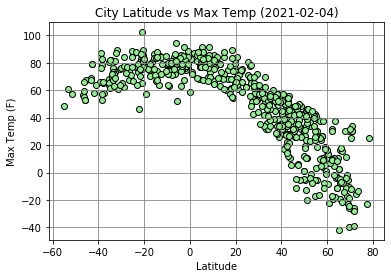

In [10]:
# Create a scattor plot of latitude vs temperature
x = weather_df["Lat"]
y = weather_df["Max temp"]
plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs Max Temp (2021-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_MaxTemp_20210204")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Max Temp (F) for that city. At the lower latitude points of -60 the max temp rises as the data points go towards zero (the equator) and decrease as the points increase in latitude, with the data points going to negative temperatures at 40 degrees north.

## Latitude vs. Humidity Plot

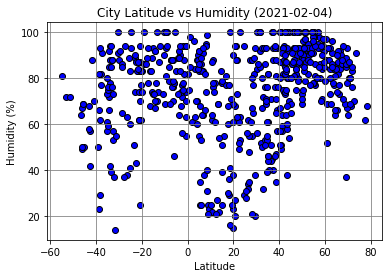

In [11]:
x = weather_df["Lat"]
y = weather_df["Humidity"]
plt.scatter(x,y,edgecolors="black",facecolors="blue")
plt.title("City Latitude vs Humidity (2021-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Humidity_20210204")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Humidity % for that city. Looking at the graph there is not a strong correlation between latitude and humidity. At the equator the humidity stays above 40%.

## Latitude vs. Cloudiness Plot

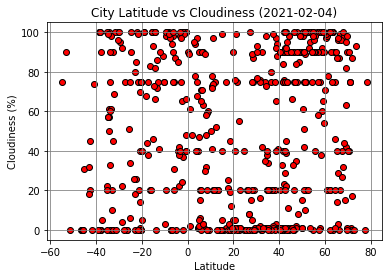

In [12]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
plt.title("City Latitude vs Cloudiness (2021-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Cloudiness_20210204")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the cloudiness for that city. Looking at the graph there is not a strong correlation between latitude and cloudiness, however there appear to be a lot of either no clouds or 100% cloud cover for the cities on this date.

## Latitude vs. Wind Speed Plot

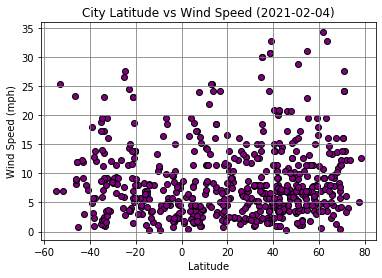

In [13]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",facecolors="purple")
plt.title("City Latitude vs Wind Speed (2021-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_WindSpeed_20210204")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the wind speed for that city. Looking at the graph there is not a strong correlation between latitude and wind speed, however the higher latitudes around 40 degrees had a very windy day with over 30 mph wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


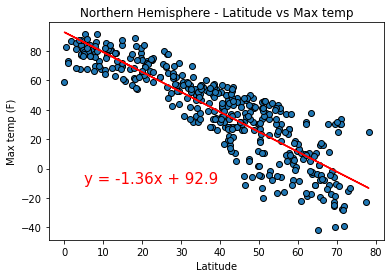

In [14]:
# Calculate the r value
y_value = "Max temp"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (F)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48


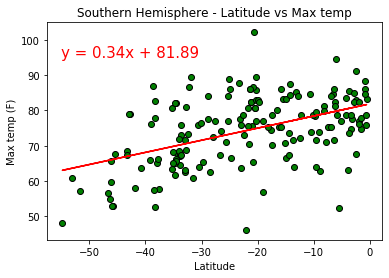

In [22]:
# Calculate the r value
y_value = "Max temp"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (F)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:purple"> There is a strong negative correlation between the latitude in the Northern Hemisphere and Max Temp. The further away from the equator heading north the colder it gets, with it being very chilly once the cities start to hit 40 degrees north. Similar in the Southern Hemisphere, the further away from the equator the colder it gets. The Southern Hemisphere has a moderate positive correlation between latitude and Max Temp. </span>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.38


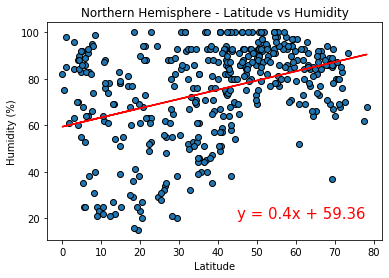

In [16]:
# Calculate the r value
y_value = "Humidity"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31


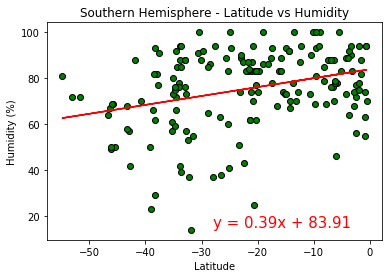

In [24]:
# Calculate the r value
y_value = "Humidity"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-28,15),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:green"> In both the Northern and Southern Hemispheres there is a positive weak correlation between Latitude and Humidity. The further north the cities are in the North Hemisphere they tend to be more humid compared to the equator, whereas in the Southern Hemisphere the further south the cities are the are less humid. </span>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3


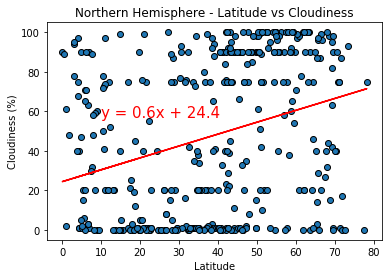

In [31]:
# Calculate the r value
y_value = "Cloudiness"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(10,57),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28


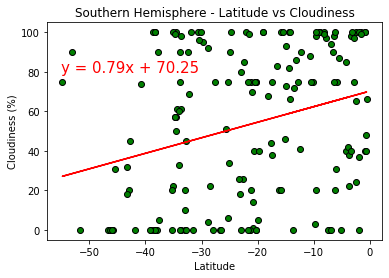

In [33]:
# Calculate the r value
y_value = "Cloudiness"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (%)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:blue"> Both the Northern and Southern Hemispheres show a positive weak correlation between Latitude and Cloudiness. The further north the cities are in the North Hemisphere they tend to be more cloudy compared to the equator, whereas in the Southern Hemisphere the further south the cities are the are less cloudy. </span>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09


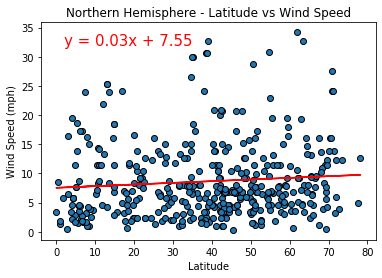

In [37]:
# Calculate the r value
y_value = "Wind Speed"
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere[y_value]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(2,32),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/NorthernHemisphere_{y_value}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24


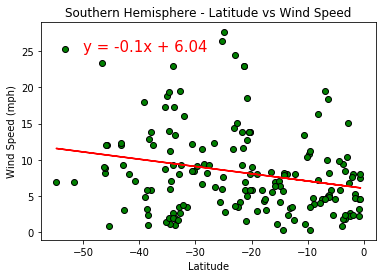

In [38]:
# Calculate the r value
y_value = "Wind Speed"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()

<span style="color:red"> As far as the wind speed goes for around the globe there is a very weak correlation to latitude vs wind speed. The Northern Hemisphere has close to no correlation at 0.09, and the Southern Hemisphere is very weak at -0.24 with there being more wind the further south the cities are compared to at the equator with less wind. </span>